<h2 style="color:black">Importing Necessary Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

<h2 style="color:black">Loading Project Dataset</h2>

In [3]:
# Load the dataset
df = pd.read_csv('Data/News_Categories.csv')

In [4]:
df.head()

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,5/26/2018
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,5/26/2018
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,5/26/2018
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,5/26/2018
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",5/26/2018


<h2 style="color:black">Exploratory Data Analysis (EDA)</h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         200853 non-null  int64 
 1   category           200853 non-null  object
 2   headline           200847 non-null  object
 3   authors            164233 non-null  object
 4   link               200853 non-null  object
 5   short_description  181141 non-null  object
 6   date               200853 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.7+ MB


In [6]:
df.describe()

,Unnamed: 0
count,200853.000000
mean,100426.000000
std,57981.411146
min,0.000000
25%,50213.000000
50%,100426.000000
75%,150639.000000
max,200852.000000


In [7]:
df.shape

(200853, 7)

<h3 style="color:black">i. Data Pre-processing</h3>

In [8]:
# Data Preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return ' '.join(tokens)
    else:
        return ''

In [9]:
# Applying preprocessing to the Project Dataset
df['headline'] = df['headline'].fillna('')
df['short_description'] = df['short_description'].fillna('')
df['processed_text'] = df['headline'] + ' ' + df['short_description']
df['processed_text'] = df['processed_text'].apply(preprocess_text)
df = df[df['processed_text'] != '']

<h3 style="color:black">ii. Data Analysis and Visualization </h3>

In [10]:
# Data Analysis and Visualization
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 200827 entries, 0 to 200852
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         200827 non-null  int64 
 1   category           200827 non-null  object
 2   headline           200827 non-null  object
 3   authors            164208 non-null  object
 4   link               200827 non-null  object
 5   short_description  200827 non-null  object
 6   date               200827 non-null  object
 7   processed_text     200827 non-null  object
dtypes: int64(1), object(7)
memory usage: 13.8+ MB
None


In [11]:
print("\nCategory Distribution:")
category_counts = df['category'].value_counts()
print(category_counts)


Category Distribution:
category
POLITICS          32737
WELLNESS          17827
ENTERTAINMENT     16056
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6686
QUEER VOICES       6313
FOOD & DRINK       6226
BUSINESS           5936
COMEDY             5171
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3457
DIVORCE            3426
CRIME              3405
MEDIA              2814
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2577
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1399
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1143
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATI

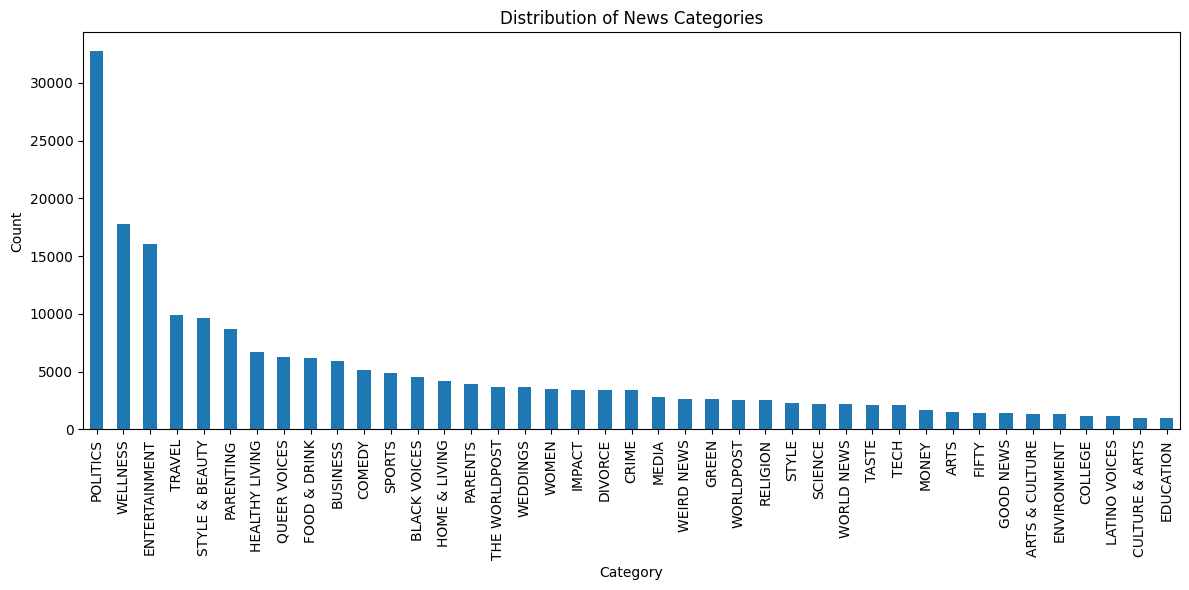

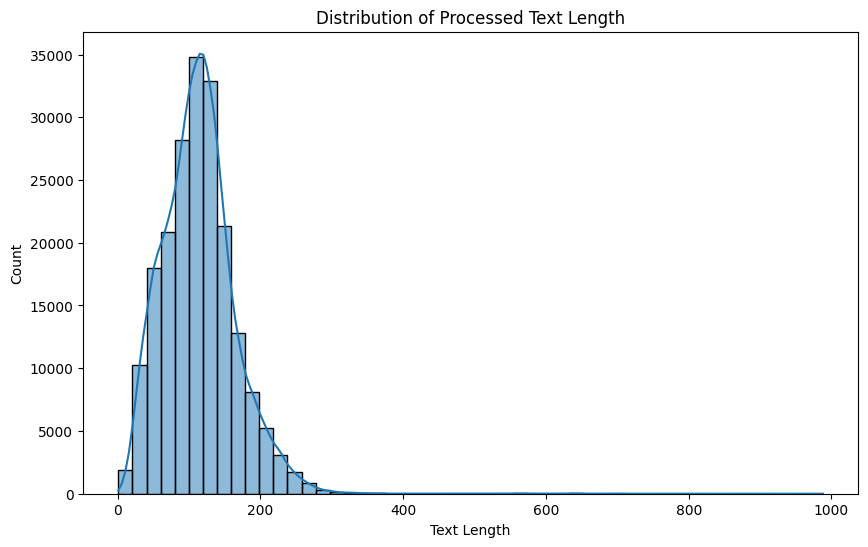

In [12]:
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Text Length Analysis
df['text_length'] = df['processed_text'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Processed Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

new: 18615
trump: 17886
one: 16495
photo: 14191
time: 13884
day: 13493
year: 13331
people: 12269
say: 11735
like: 11729
make: 11397
life: 11382
get: 11246
way: 10497
woman: 10306
u: 9180
world: 8856
want: 8814
thing: 8552
know: 8250


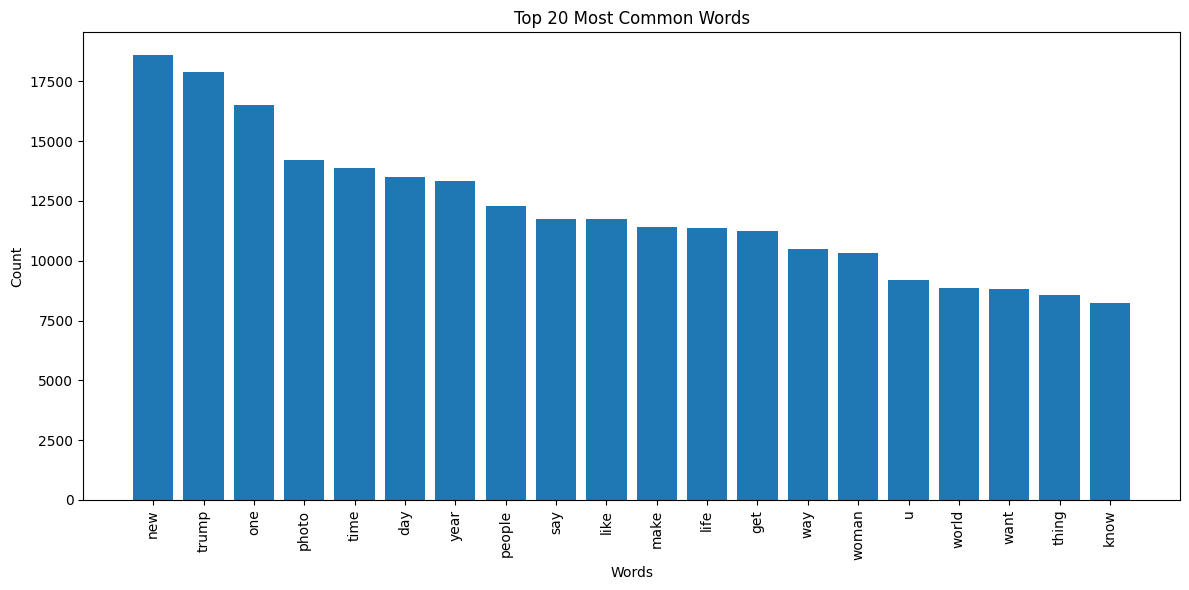

In [13]:
# Most Common Words
from collections import Counter
all_words = ' '.join(df['processed_text']).split()
word_counts = Counter(all_words)
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20])

# Printing the top words
for word, count in top_words.items():
    print(f"{word}: {count}")

#Plotting the top words
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Prepare data for modeling
X = df['processed_text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3 style="color:black">Vectorization</h3>

In [15]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

<h2 style="color:black">Modeling</h2>


Naive Bayes Results:
Accuracy: 0.5211
F1 Score: 0.4565
Precision: 0.5707
Recall: 0.5211
Confusion Matrix:
[[ 13   1   2 ...   0   0   0]
 [  2   1   3 ...   5   0   0]
 [  1   0 116 ...   0   0   0]
 ...
 [  0   1   4 ...  64   0   0]
 [  0   0   1 ...   1  23   1]
 [  1   0   1 ...   0   2  43]]


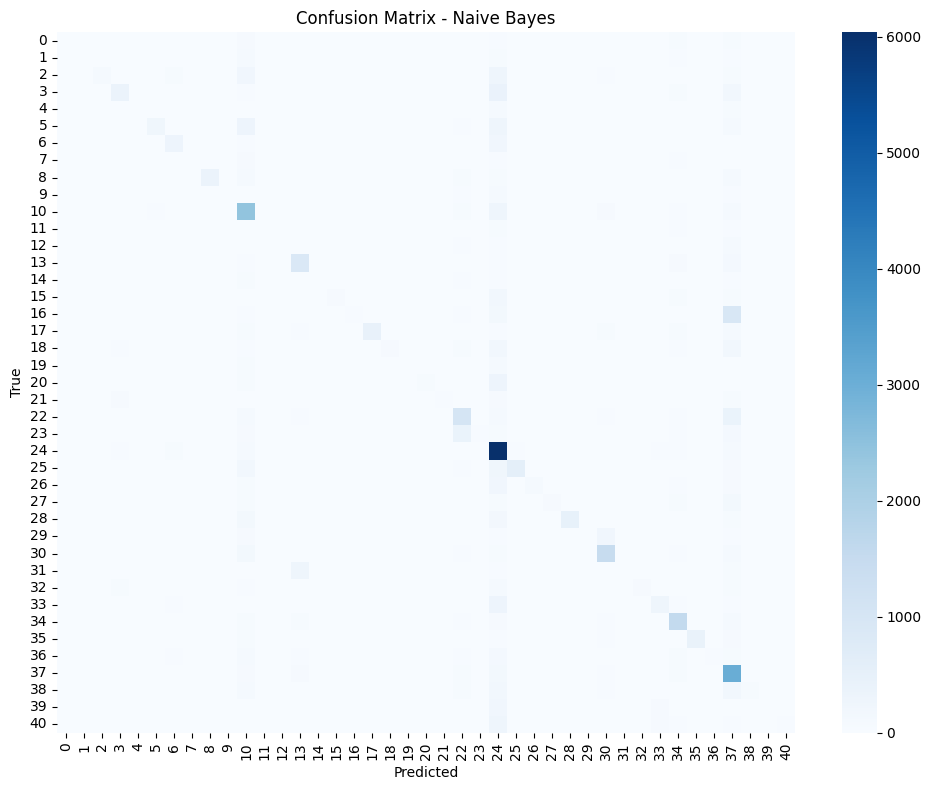


SVM Results:
Accuracy: 0.5738
F1 Score: 0.5536
Precision: 0.5500
Recall: 0.5738
Confusion Matrix:
[[ 48  19   6 ...   0   3   0]
 [ 29  34   9 ...  12   2   0]
 [  7   6 298 ...  10   2   3]
 ...
 [  1   5  11 ... 178   2   3]
 [  0   0   1 ...   3  86  25]
 [  2   2   6 ...   3  18 141]]


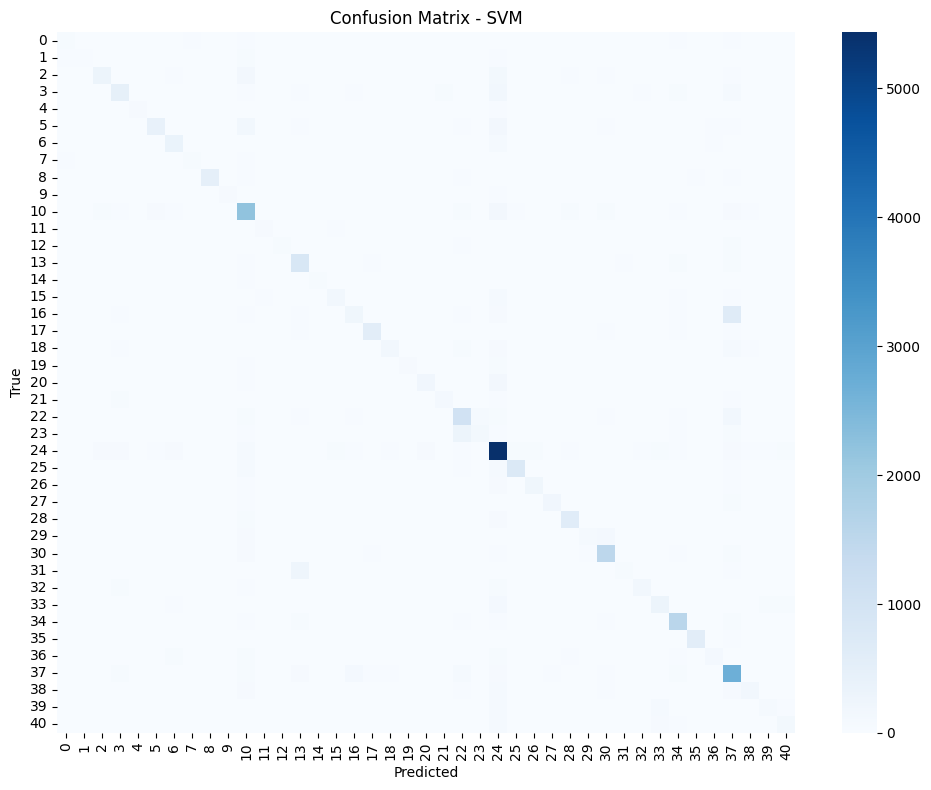


Random Forest Results:
Accuracy: 0.5329
F1 Score: 0.5015
Precision: 0.5205
Recall: 0.5329
Confusion Matrix:
[[ 48   3   4 ...   4   0   1]
 [ 23  24   4 ...  19   0   1]
 [  2   2 226 ...   8   0   1]
 ...
 [  2   2   3 ... 184   0   2]
 [  0   0   2 ...   4  28  12]
 [  1   1   2 ...   3   3 118]]


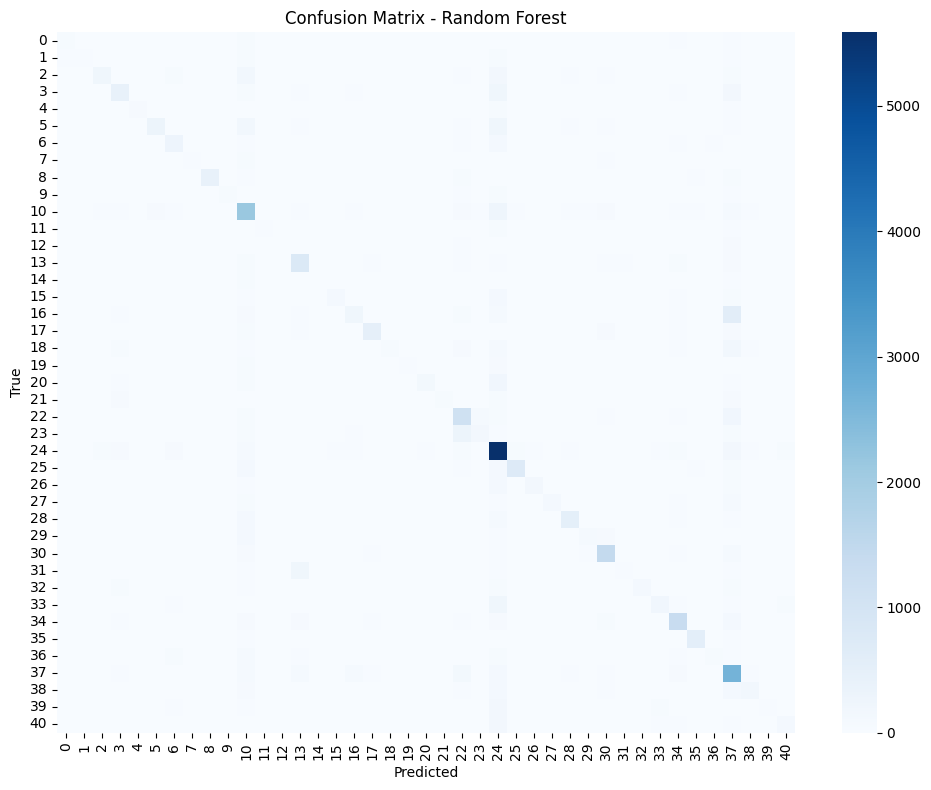

In [16]:
# Model training and evaluation
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\n{name} Results:")
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = (name, model)

In [17]:
# Creating a comparison table to know the best performing model
comparison_table = pd.DataFrame({
    'Model': models.keys(),
    'Accuracy': [accuracy_score(y_test, model.predict(X_test_vectorized)) for model in models.values()],
    'F1 Score': [f1_score(y_test, model.predict(X_test_vectorized), average='weighted') for model in models.values()],
    'Precision': [precision_score(y_test, model.predict(X_test_vectorized), average='weighted') for model in models.values()],
    'Recall': [recall_score(y_test, model.predict(X_test_vectorized), average='weighted') for model in models.values()]
})

print(comparison_table)

           Model  Accuracy  F1 Score  Precision    Recall
0    Naive Bayes  0.521087  0.456476   0.570726  0.521087
1            SVM  0.573844  0.553587   0.550008  0.573844
2  Random Forest  0.532938  0.501470   0.520526  0.532938


<Figure size 1200x600 with 0 Axes>

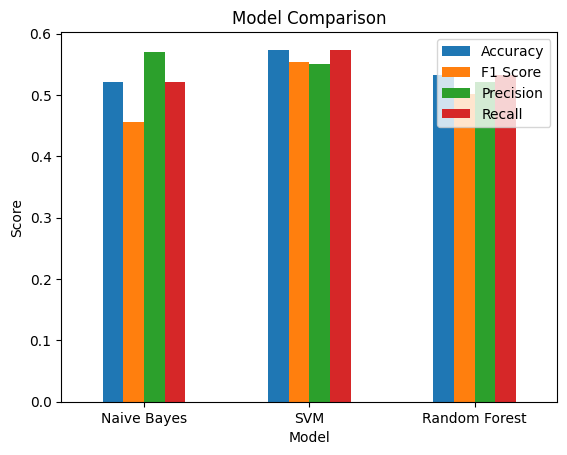

In [18]:
# Visualization of the model results using a Bar plot
plt.figure(figsize=(12, 6))
comparison_table.plot(kind='bar', x='Model', y=['Accuracy', 'F1 Score', 'Precision', 'Recall'], rot=0)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.show()

<h2 style="color:black">Feature Importance</h2>


Best performing model: SVM


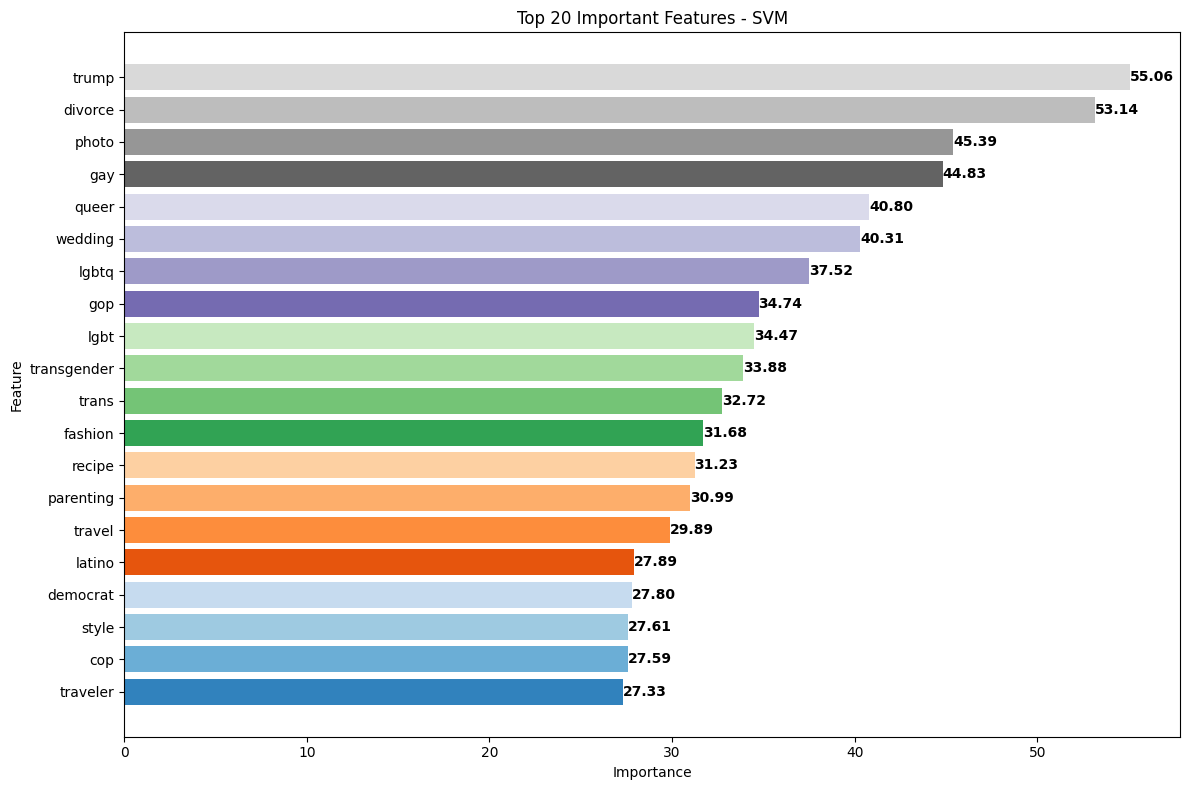

In [19]:
# Feature Importance for the best model
best_model = max(models.values(), key=lambda x: accuracy_score(y_test, x.predict(X_test_vectorized)))
best_model_name = [k for k, v in models.items() if v == best_model][0]
print(f"\nBest performing model: {best_model_name}")

if best_model_name in ['Random Forest', 'SVM']:
    if best_model_name == 'Random Forest':
        feature_importance = best_model.feature_importances_
    else:  # SVM
        feature_importance = np.abs(best_model.coef_).sum(axis=0)
    
    feature_names = vectorizer.get_feature_names_out()
    
    # Get top 20 features
    top_features = sorted(zip(feature_importance, feature_names), reverse=True)[:20]
    
    plt.figure(figsize=(12, 8))
    
    # Generate a colormap with 20 distinct colors
    cmap = plt.get_cmap('tab20c')
    colors = cmap(np.linspace(0, 1, 20))
    
    # Create the bar plot with different colors
    bars = plt.barh([f[1] for f in top_features][::-1], [f[0] for f in top_features][::-1], color=colors)
    plt.title(f'Top 20 Important Features - {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    
    # Add importance values to the bars
    for bar, importance in zip(bars, [f[0] for f in top_features][::-1]):
        plt.text(importance, bar.get_y() + bar.get_height()/2, f"{importance:.2f}", 
                 ha='left', va='center', fontweight='bold')
    
    plt.show()
else:
    print("Feature importance not available for Naive Bayes model.")